<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Grid_search_and_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Search

From our discussion above it is clear that in order to find the best model we have to perform a **search** over the model space using parameters that dictate the complexity of the model.  In the case of the decision tree model the tree depth controls the complexity of the model.  In order to find our best model we had to try different values for that parameter, or

> We had to **search** over the model space of the decision tree by trying different values for tree depth in order to find a model with just the right complexity.


## Train and Test

We have already seen that just using a training set for model evaluation does not work! Our solution was to split the training data into a training and a test/validation set.

<img src = "https://drive.google.com/uc?id=15nsrWGi0v4fb4IujVhHZFXmnU6pjOFvc" width=500>

### Problem!

* Train-testing relies on randomly splitting the training data into two parts.

* If this split just happens to be a 'bad' split our results might be biased.

An example of a 'bad' split is that by chance that most of the instances in our dataset with a particular label wind up in the test/validation set and none in the training set.  In this case, the model has a very limited chance to learn about patterns with this particular label and will probably misclassify most the instances with that label in the test/validation set.

**Solution:** Cross-validation


## Cross-Validation

Cross validation can be another powerful preventative measure against overfitting. Why? Imagine if your test training split is a bad split. To overcome this difficulty we now split the training dataset into training and validation set.

In cross-validation we perform two trials (model constructions) where, in each trial, we switch the roles of our two sets (see the figure below).  In order to evaluate the model performance in cross-validation, we build and evaluate a model in each trial and then take the average performance between the two models as the performance of the cross-validation.  Notice that this will mitigate the 'bad' split issue mentioned above.

<img src = "https://drive.google.com/uc?id=1xhp1IjCg72QCfJZZNfJG1v_oa6D0c-KQ" width=500>


BUT, what if is the split was really bad: e.g. one of the sets does not contain any examples of one of the classes.

**Solution:** Create more trials - *n-fold cross-validation*

As a solution to a single bad split:
* perform the split multiple times, 
* then train and test on each fold,
* take the average of the model performance of each fold in order to determine the **cross-validated model performance**

Example: 
* 5-fold cross-validation - split the training data into 5 partitions (folds)
* Use each fold as a test/validation set and the other folds as training set
* Multiple splits - even if one is bad it will be balanced out by the others.

<img src = "https://drive.google.com/uc?id=1WxAKTTrm4agcR0ema4VRPQ0LmK5EWp06" width=500>

**Note**: 5-fold cross-validation is interesting because each trial essentially has an 80-20 split: 80% of the data for training and 20% for testing.  This is one of the more common ways to split a dataset into training and testing sets.

**Note**: We have to train and test models five times in 5-fold cross-validation.

##Load the Breast Cancer Dataset

In [6]:
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score

In [7]:
# get data
url = 'https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/wdbc.csv' # the URL
df = pd.read_csv(url)
features  = df.drop(['ID','Diagnosis'],axis=1)
target = df['Diagnosis']

##Split the dataset

In [8]:
#From the model selection library import the function for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split 
# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

##Model building with cross validation

In [9]:
# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# set up the model
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# do the 5-fold cross validation
scores = cross_val_score(dtree, X_train, y_train,cv=cv)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.92 0.97 0.95 0.95 0.93]
Accuracy: 0.94


The accuracy score varies between 92%-97% when we use 5-fold cross validation with a mean accuracy of 94%. 

## Model Search with Cross-Validation

Once we switch to a cross-validation approach our model search becomes something different.  Instead of searching over the model space we search over 
the **parameter space** for the best set of parameters.

<img src="https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/cross-validated-curve.png"  height="300" width="450">

This is due to the fact that cross-validation builds **multiple** models and the cross-validated performance is the **mean performance** of the models built on the various folds. Searching over the parameter space is called **grid search**.


## Model Search as a Grid Search

You probably figured out by now that the only way to find the best model for a particular dataset is to search for it by trying different (hyper-)parameters that control the complexity of the models.  Therefore:

* Finding the best model involves searching for (hyper-)parameter values that give you the best testing/cross-validation accuracy.
* This is usually referred to as the *grid search*.



Sklearn helps us do that efficiently:
Sklearn has a built-in grid search that can optimize the model parameters.  In our case the decision tree classifiere has two parameters: criterion and depth. The grid search will find the optimal value for both of these parameters. The grid search function will return two things:

1. the optimal parameter set
2. the optimal classifier

##Grid search with cross validation

In [10]:
# Grid search with cross-validation for wisconsin breast cancer dataset
from sklearn.model_selection import GridSearchCV

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
grid.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 5}


##Visualize the model

[Ellipsis]

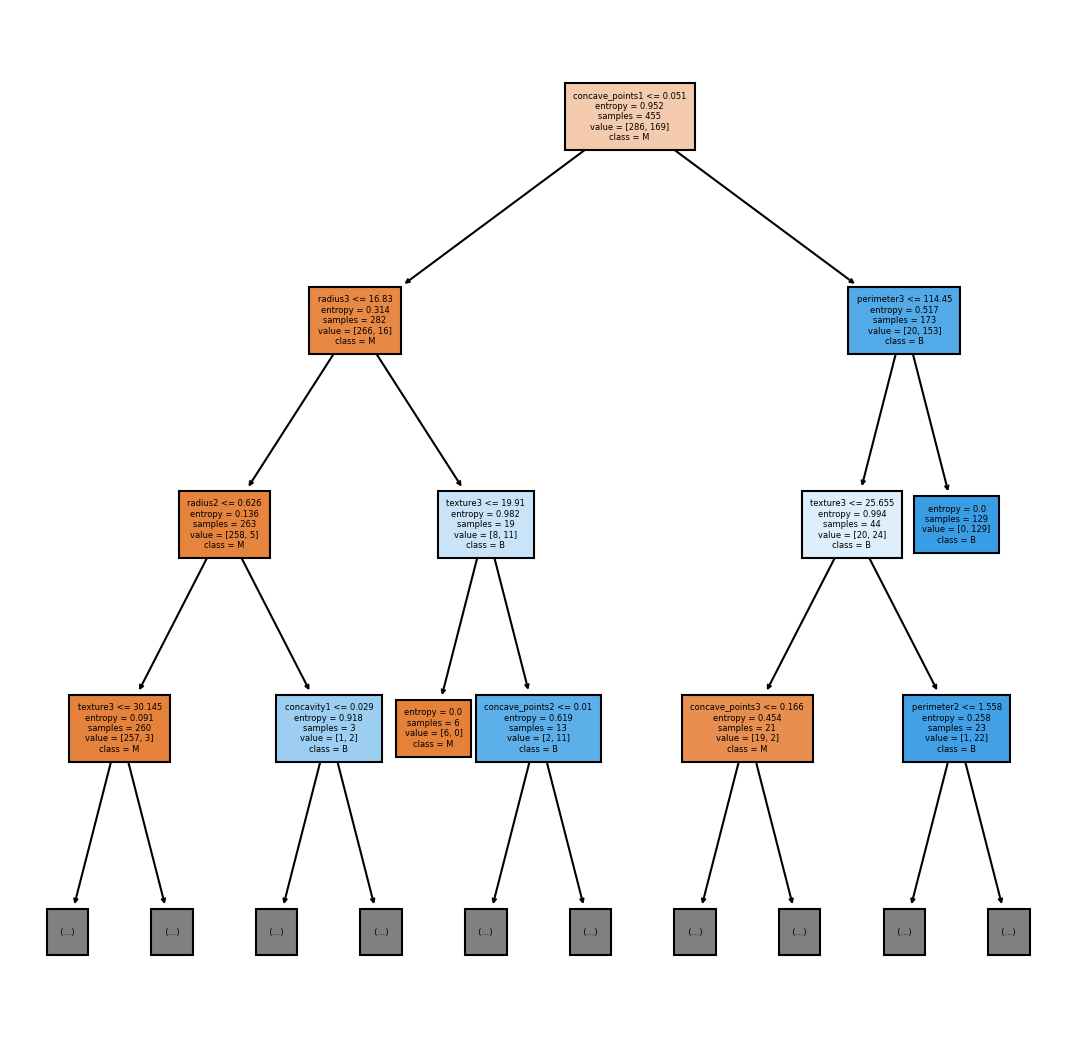

In [12]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(grid.best_estimator_, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['M','B'])
[...]

##Prediction and accuracy

In [14]:
# predicting        
pred_test = grid.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score
# accuracy of optimal classifier        
print("Accuracy of optimal model: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Accuracy of optimal model: 0.95


**Note**: Grid search is computationally very expensive! In the two cases above we had two types of splitting criteria (gini and entropy) and we had 10 levels of complexity.  In addition we performed 5-fold cross-validation for each parameter combination.  Doing the math , we built $2{\times}10{\times}5 = 100$ models for each grid search.

# Model Accuracy Reexamined

Consider a classification problem with two classes, then we observe the following outcomes of a prediction of a suitable classification model:

>true positive (TP) -- predicted positive coincides with actual positive

>true negative (TN) -- predicted negative coincides with actual negative

>false positive (FP), Type I error -- predicted positive but actual negative

>false negative (FN), Type II error -- predicted negative but actual positive

Two types of errors possible!


### The Confusion Matrix

* We can arrange the predictions in a matrix form
* Errors will show up as values outside the major diagonal

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/confusion2.png" height="200" width="250">

# Putting it All Together

Let's apply everything we have learned so far: build the best model, and then evaluate it.

In [15]:
from sklearn.metrics import confusion_matrix

# build and print the confusion matrix 
labels = ['M','B']
cm = confusion_matrix(y_test, pred_test, labels=labels)

cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Confusion Matrix:
    M   B
M  39   4
B   2  69


Taking our top three features from our decision tree and creating a scatter plot.

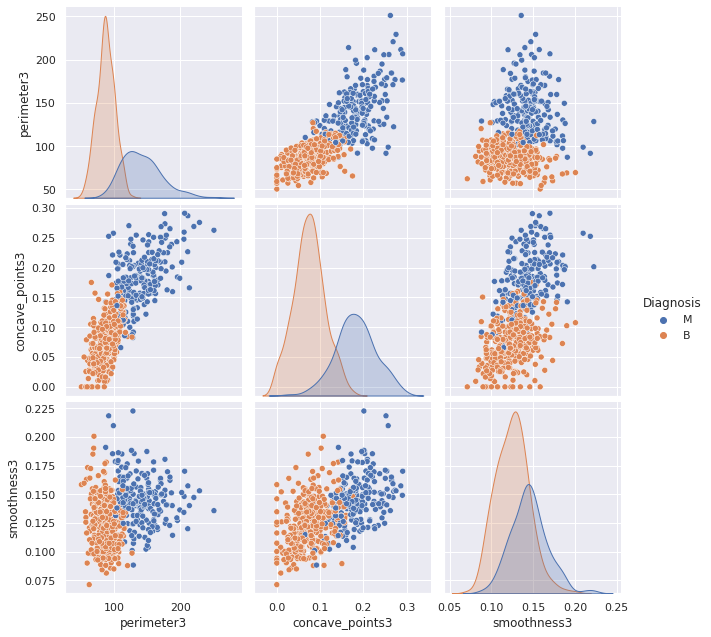

In [ ]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Diagnosis', height=3, vars=["perimeter3", "concave_points3", "smoothness3"])

# Reading

[Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)